In [1]:
#Importing the neccessary Libararies.
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, make_scorer, f1_score, classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
dataset = pd.read_pickle('C:/Users/vaish/OneDrive/Desktop/SES/Data Science/Team-4-Vaishnavi Mantri-Ganesh-Kukreja/Data/df_FinalDataset.csv')

In [3]:
# Define columns to be removed
remove_these_columns = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'AttendingPhysician',
                        'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
                        'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                        'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                        'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                        'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
                        'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
                        'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode',
                        ]

In [4]:
# Remove unnecessary columns
Train_category_removed = dataset.drop(axis=0, columns=remove_these_columns)

In [5]:
# Define features (X) and target variable (Y)
X_df = Train_category_removed[['InscClaimAmtReimbursed','OPAnnualDeductibleAmt',
                               'IPAnnualDeductibleAmt', 'IPAnnualReimbursementAmt', 
                               'OPAnnualReimbursementAmt', 'State', 'County',]]

In [6]:
Y_df = Train_category_removed['PotentialFraud']

In [7]:
# Convert 'Yes' and 'No' to 1 and 0
Y_df.replace(['Yes', 'No'], [1, 0], inplace=True)

In [8]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=101)

In [9]:
# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

In [10]:
#Defining Hyper Parameters for Gaussian Naive Bayes.
params_GaussianNB={'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

In [11]:
# Initialize Grid Search with cross-validation
grid_search_GaussianNB = GridSearchCV(estimator=naive_bayes_classifier,
                                      param_grid=params_GaussianNB, cv=3, scoring='f1', n_jobs=-1, verbose=0)

In [12]:
# Fit the model
grid_search_GaussianNB.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='f1')

In [13]:
# Get the best parameters
best_params_Gaussian_NB = grid_search_GaussianNB.best_params_

In [14]:
# Use the best parameters to create a new model
best_GNB_classifier_ = GaussianNB(**best_params_Gaussian_NB)

In [15]:
# Fit the new model
best_GNB_classifier_.fit(X_train, Y_train)

GaussianNB(var_smoothing=1e-05)

In [16]:
# Predict on the test set
Y_Pred = best_GNB_classifier_.predict(X_test)

In [17]:
# Evaluate the model
accuracy = accuracy_score(Y_test,Y_Pred)
f1 = f1_score(Y_test,Y_Pred)
class_rep = classification_report(Y_test,Y_Pred)
conf_matrix = confusion_matrix(Y_test,Y_Pred)

In [18]:
print("Best Hyperparameters:",best_params_Gaussian_NB)
print("\nAccuracy:", round(accuracy * 100, 2))
print("F1 Score:", round(f1 * 100, 2))
print("\nClassification Report:\n", class_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Best Hyperparameters: {'var_smoothing': 1e-05}

Accuracy: 62.66
F1 Score: 18.33

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.95      0.76    103529
           1       0.56      0.11      0.18     63935

    accuracy                           0.63    167464
   macro avg       0.59      0.53      0.47    167464
weighted avg       0.60      0.63      0.54    167464


Confusion Matrix:
 [[97912  5617]
 [56919  7016]]


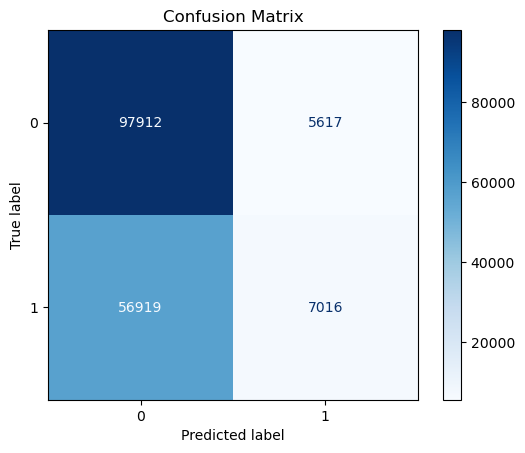

In [19]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_GNB_classifier_.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Convert 'Dead_Alive?' to 1 and 0
Train_category_removed['Dead_Alive'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [21]:
# Define features (X) and target variable (Y)
X_df = Train_category_removed[['Claim_Duration','Att_Phy_tot_claims','OPAnnualDeductibleAmt',
                               'IPAnnualDeductibleAmt','IPAnnualReimbursementAmt', 
                               'OPAnnualReimbursementAmt','State', 'County','Dead_Alive']]

In [22]:
Y_df = Train_category_removed['PotentialFraud']

In [23]:
# Convert 'Yes' and 'No' to 1 and 0
Y_df.replace(['Yes', 'No'], [1, 0], inplace=True)

In [24]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=101)

In [25]:
# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

In [26]:
#Defining Hyper Parameters for Gaussian Naive Bayes.
params_GaussianNB={'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

In [27]:
# Initialize Grid Search with cross-validation
grid_search_GaussianNB = GridSearchCV(estimator=naive_bayes_classifier,
                                      param_grid=params_GaussianNB, cv=3, scoring='f1', n_jobs=-1, verbose=0)

In [28]:
# Fit the model
grid_search_GaussianNB.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='f1')

In [29]:
# Get the best parameters
best_params_Gaussian_NB = grid_search_GaussianNB.best_params_

In [30]:
# Use the best parameters to create a new model
best_GNB_classifier_ = GaussianNB(**best_params_Gaussian_NB)

In [31]:
# Fit the new model
best_GNB_classifier_.fit(X_train, Y_train)

GaussianNB()

In [32]:
# Predict on the test set
y_pred =best_GNB_classifier_.predict(X_test)

In [33]:
# Perform cross-validation
f1_scorer = make_scorer(f1_score)
accuracy_scorer = make_scorer(accuracy_score)
cross_val_scores_f1 = cross_val_score(best_GNB_classifier_, X_train, Y_train, cv=5, scoring=f1_scorer)
cross_val_scores_accuracy = cross_val_score(naive_bayes_classifier, X_train, Y_train, cv=5, scoring=accuracy_scorer)

In [34]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
class_rep = classification_report(Y_test, y_pred)
conf_matrix_GNB = confusion_matrix(Y_test, y_pred)

In [35]:
print("\nAccuracy:", round(accuracy * 100, 2))
print("F1 Score:", round(f1 * 100, 2))
print("\nClassification Report:\n", class_rep)
print("\nConfusion Matrix:\n", conf_matrix_GNB)


Accuracy: 67.56
F1 Score: 34.64

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.95      0.78    103529
           1       0.75      0.23      0.35     63935

    accuracy                           0.68    167464
   macro avg       0.71      0.59      0.57    167464
weighted avg       0.70      0.68      0.62    167464


Confusion Matrix:
 [[98734  4795]
 [49537 14398]]


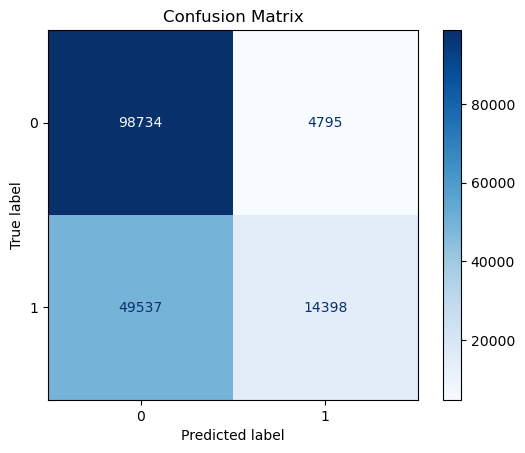

In [36]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_GNB, display_labels=best_GNB_classifier_.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.title('Confusion Matrix')
plt.show()